## Remove Perspective Distortion : with Hough Line Transformation

In [23]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [24]:
img = cv2.imread('paper.jpg')
width0 = int(img.shape[1]/3)
height0 = int(img.shape[0]/3)
img = cv2.resize(img, (width0,height0), interpolation=cv2.INTER_CUBIC)
img.shape

(480, 360, 3)

In [25]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

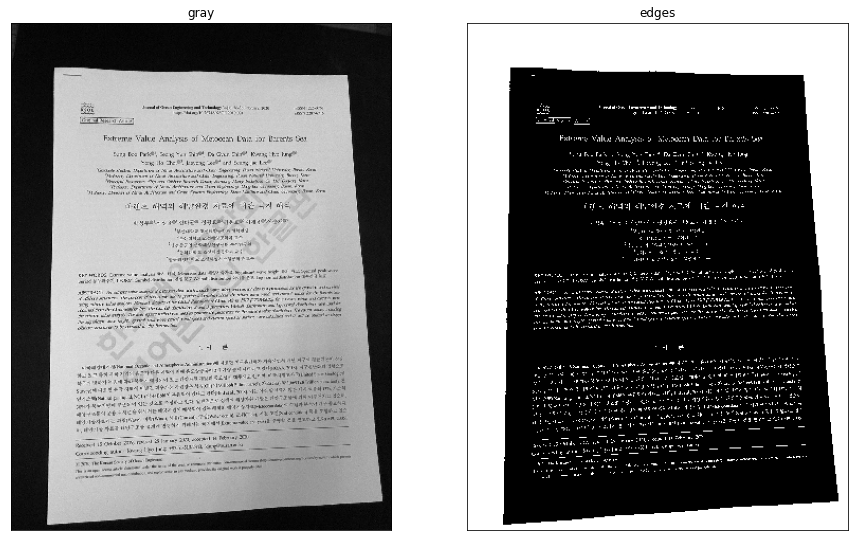

In [26]:
plt.figure(figsize=(15,30))
plt.subplot(121),plt.imshow(gray,cmap = 'gray')
plt.title('gray'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(thresh,cmap = 'gray')
plt.title('edges'), plt.xticks([]), plt.yticks([])
plt.show()

In [27]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)


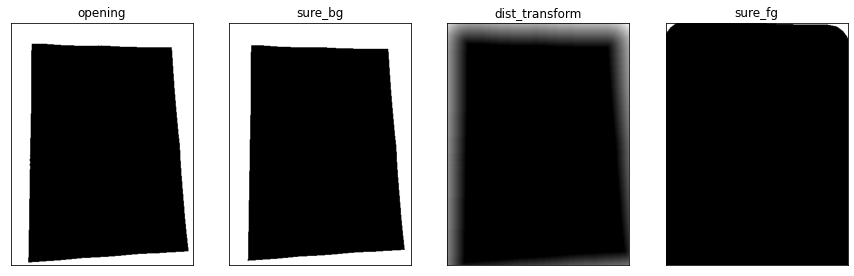

In [28]:
plt.figure(figsize=(15,30))
plt.subplot(141),plt.imshow(opening,cmap = 'gray')
plt.title('opening'), plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(sure_bg,cmap = 'gray')
plt.title('sure_bg'), plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(dist_transform,cmap = 'gray')
plt.title('dist_transform'), plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(sure_fg,cmap = 'gray')
plt.title('sure_fg'), plt.xticks([]), plt.yticks([])
plt.show()

In [29]:
opening.shape

(480, 360)

In [30]:
edges = cv2.Canny(opening,150,200,apertureSize = 3)
lines = cv2.HoughLines(edges,1,np.pi/180,150)
lines.shape[0]

3

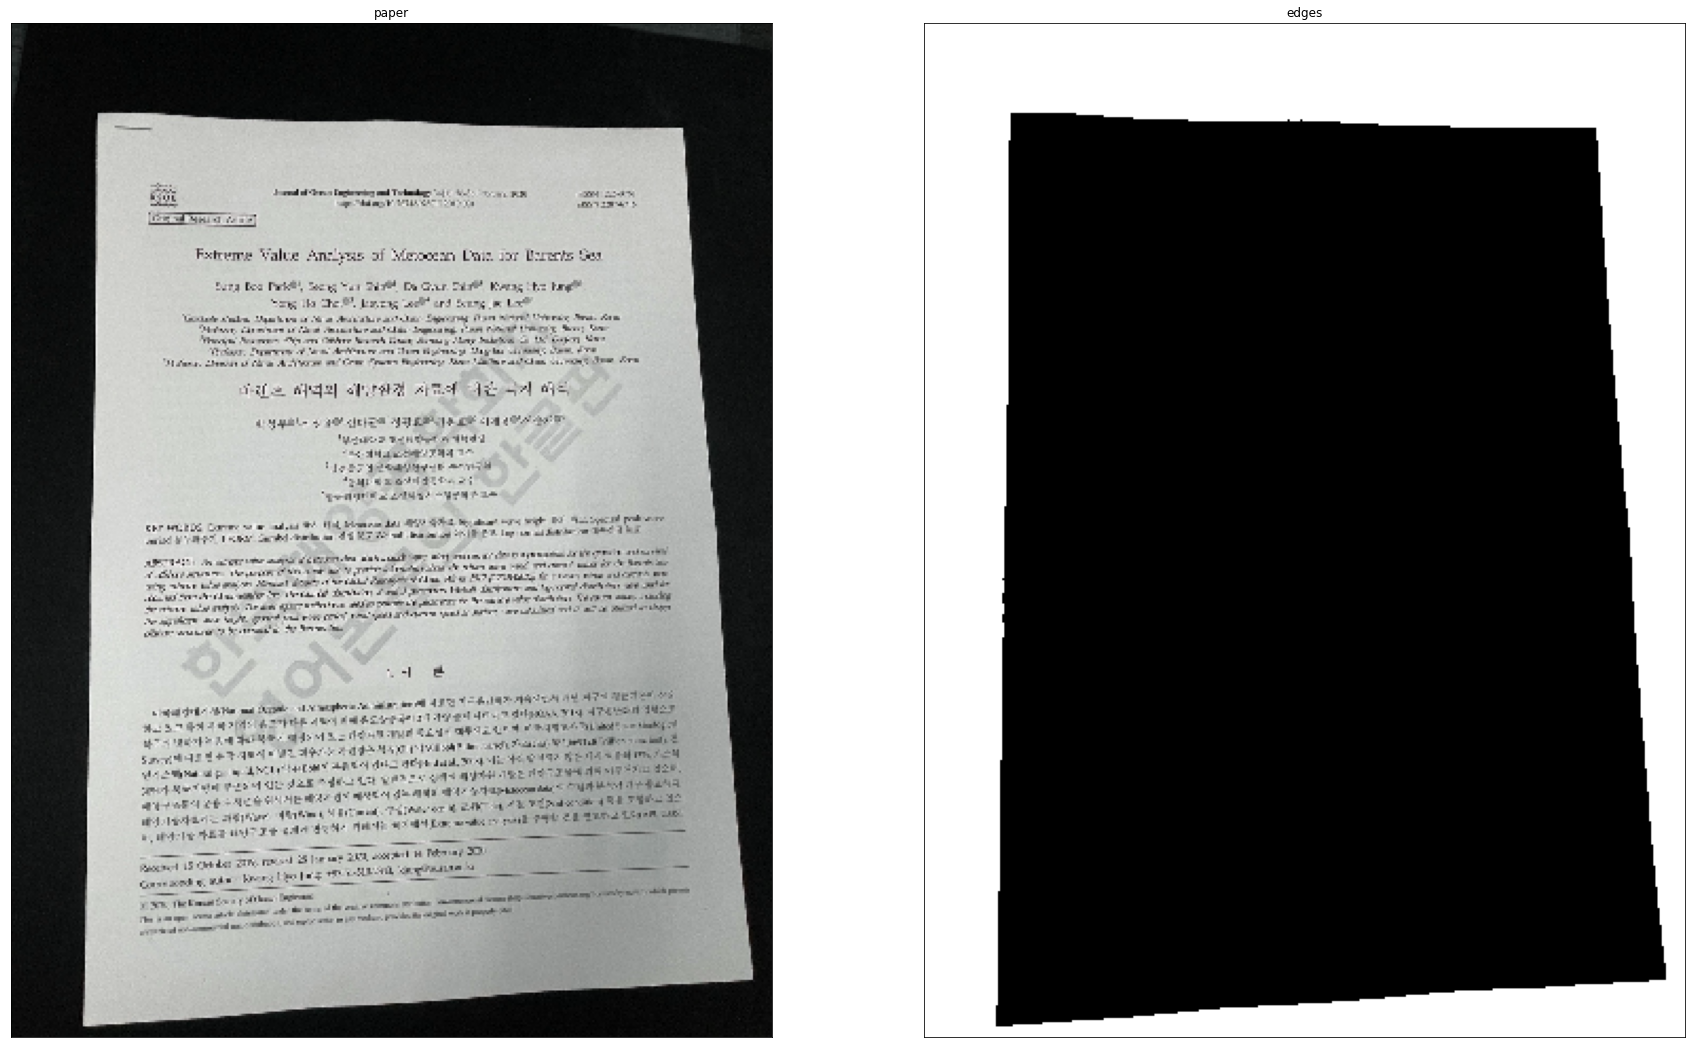

In [31]:
plt.figure(figsize=(30,45))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('paper'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(opening,cmap = 'gray')
plt.title('edges'), plt.xticks([]), plt.yticks([])
plt.show()

In [16]:
def nothing(x):
    pass

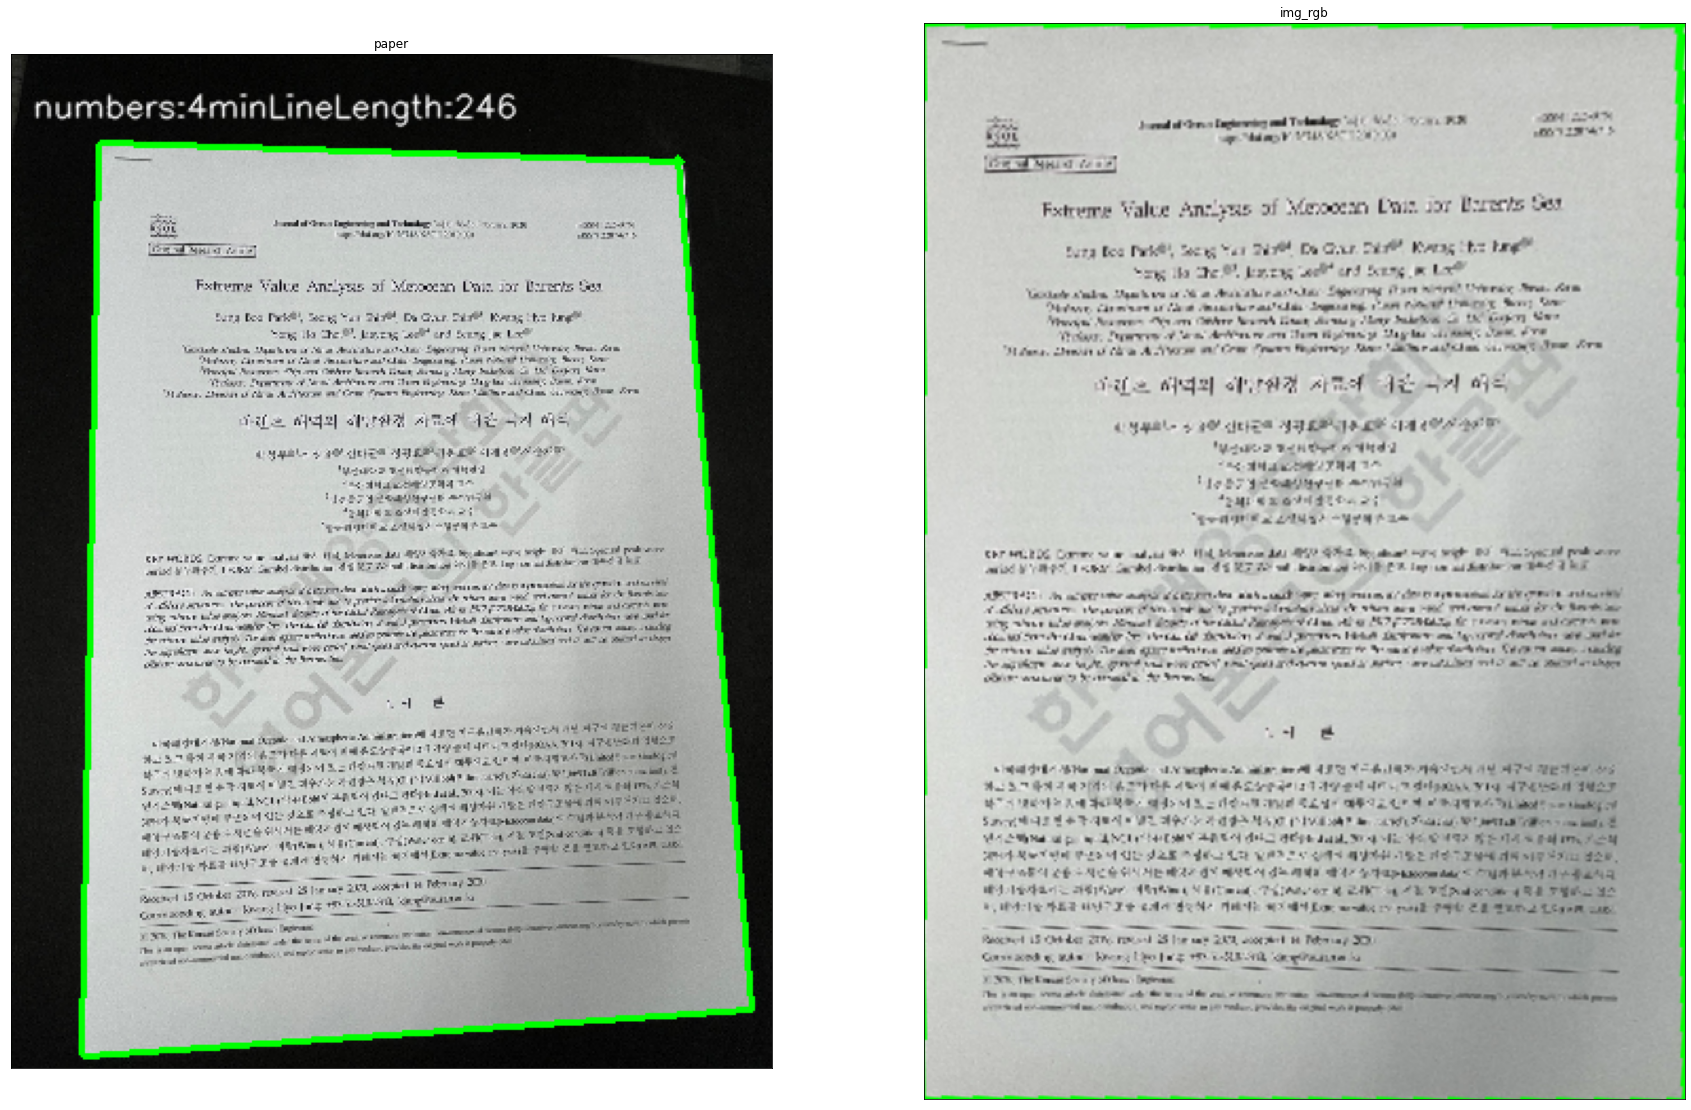

In [44]:
cv2.namedWindow('image')
cv2.createTrackbar('minLineLength', 'image', 1, 500, nothing)
cv2.createTrackbar('maxLineGap', 'image', 1, 500, nothing)
cv2.createTrackbar('number', 'image', 1, 500, nothing)
font = cv2.FONT_HERSHEY_SIMPLEX
while(1):
    k = cv2.waitKey(1) & 0xFF
    j=0
    if k == 27:
        pts1 = np.float32([[0,0],[0,0],[0,0],[0,0]])
        pts2 = np.float32([[0,0],[595,0],[595,842],[0,842]])
        for i in range(numbers):
            j=j+1
            for x1,y1,x2,y2 in lines[i]:
                if(x1<width/2 and y1 <height/2):
                    pts1[0][0] = x1
                    pts1[0][1] = y1
                if(x1>width/2 and y1 >height/2):
                    pts1[2][0] = x1
                    pts1[2][1] = y1
                if(x1<width/2 and y1 >height/2):
                    pts1[3][0] = x1
                    pts1[3][1] = y1                
                if(x1>width/2 and y1 <height/2):
                    pts1[1][0] = x1
                    pts1[1][1] = y1        
                if(x2<width/2 and y2 <height/2):
                    pts1[0][0] = x2
                    pts1[0][1] = y2
                if(x2>width/2 and y2 >height/2):
                    pts1[2][0] = x2
                    pts1[2][1] = y2
                if(x2<width/2 and y2 >height/2):
                    pts1[3][0] = x2
                    pts1[3][1] = y2                
                if(x2>width/2 and y2 <height/2):
                    pts1[1][0] = x2
                    pts1[1][1] = y2  
        M = cv2.getPerspectiveTransform(pts1,pts2)
        dst = cv2.warpPerspective(img_rgb,M,(595,842))
        img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(30,45))
        plt.subplot(121),plt.imshow(img_rgb,cmap = 'gray')
        plt.title('paper'), plt.xticks([]), plt.yticks([])
        plt.subplot(122),plt.imshow(dst,cmap = 'gray')
        plt.title('img_rgb'), plt.xticks([]), plt.yticks([])
        plt.show()
        break
    lineLength = cv2.getTrackbarPos('minLineLength', 'image')
    lineGap = cv2.getTrackbarPos('maxLineGap', 'image')
    number = cv2.getTrackbarPos('number', 'image')
    lines = cv2.HoughLinesP(edges,rho = 1,theta = np.pi/180,threshold = 100,minLineLength = lineLength,maxLineGap = lineGap)
    
    img_rgb = cv2.imread('paper.jpg')
    height = int(img_rgb.shape[0]/3)
    width = int(img_rgb.shape[1]/3)
    img_rgb = cv2.resize(img_rgb, (width,height), interpolation=cv2.INTER_CUBIC)
    numbers = number
    if(lines.shape[0]<number):
        numbers = lines.shape[0]
    msg = "numbers:"+str(lines.shape[0])+"minLineLength:"+str(lineLength)  
    cv2.putText(img_rgb, msg, (10, 30), font, 0.5, (255,255,255), 1, cv2.LINE_AA)    
    for i in range(numbers):
        for x1,y1,x2,y2 in lines[i]:
            cv2.line(img_rgb,(x1,y1),(x2,y2),(0,255,0),2)
    cv2.imshow('image',img_rgb)
cv2.destroyAllWindows()

In [42]:
pts1

array([[ 42.,  42.],
       [315.,  49.],
       [  0.,   0.],
       [ 34., 474.]], dtype=float32)

In [36]:
j

4

In [37]:
width

360

In [39]:
height

480

In [15]:
pts1 = np.float32([[0,0],[0,0],[0,0],[0,0]])
pts1[0]

array([0., 0.], dtype=float32)